# Multi-class Logistic Regression

## Loading the data

scipy : 과학 컴퓨팅과 기술 컴퓨팅에 사용되는 오픈 소스 파이썬 라이브러리  
scipy.io.loadmat() : MATLAB 파일 로드

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
mat = loadmat("ex3data1.mat")

X=mat["X"]
y=mat["y"]

## Visualizing subset of the training set

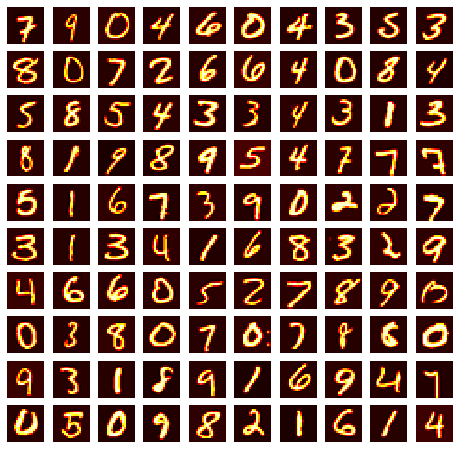

In [3]:
import matplotlib.image as mpimg
fig, axis = plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(X[np.random.randint(0,5001),:].reshape(20,20,order="F"), cmap="hot")
        axis[i,j].axis("off")

## Computing the Cost Function

$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}log(h_\theta(x^{(i)}))-(1-y^{(i)})log(1-(h_\theta(x^{(i)}))]+\frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2$

$\frac{\Delta J(\theta)}{\Delta\theta_j}=\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$ for $j=0$

$\frac{\Delta J(\theta)}{\Delta\theta_j}=\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}+\frac{\lambda}{m}\theta_j$ for $j\ge1$

theta : (n, 1)
X : (m, n)
y : (m, 1)

predictions : (m, 1)
error : (m, 1)
cost, regCost : (1, 1)

In [4]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

In [5]:
def IrCostFunction(theta, X, y, Lambda):
    m=len(y)
    predictions=sigmoid(X @ theta)
    error=(-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)
    regCost = cost + Lambda/(2*m) * sum(theta[1:]**2)
    
    j_0=1/m * (X.transpose() @ (predictions - y))[0]
    j_1=1/m * (X.transpose() @ (predictions - y))[1:] + (Lambda/m)* theta[1:]
    grad=np.vstack((j_0[:,np.newaxis],j_1))
    return regCost[0], grad

In [6]:
theta_t = np.array([-2,-1,1,2]).reshape(4,1)
X_t = np.array([np.linspace(0.1, 1.5, 15)]).reshape(3,5).T
X_t = np.hstack((np.ones((5,1)), X_t))
y_t = np.array([1,0,1,0,1]).reshape(5,1)
J, grad = IrCostFunction(theta_t, X_t, y_t, 3)
print("Cost:",J,"Expected cost: 2.534819")
print("Gradients:\n",grad,"\nExpected gradients:\n 0.146561\n -0.548558\n 0.724722\n 1.398003")

Cost: 2.534819396109744 Expected cost: 2.534819
Gradients:
 [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]] 
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003


## One-vs-all Classification

In [7]:
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        cost, grad = IrCostFunction(theta,X,y,Lambda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta, J_history

In [8]:
def oneVsAll(X,y,num_labels,Lambda):
    m,n = X.shape[0], X.shape[1]
    initial_theta = np.zeros((n+1,1))
    all_theta = []
    all_J = []
    
    X = np.hstack((np.ones((m,1)),X))
    
    for i in range(1,num_labels+1):
        theta, J_history = gradientDescent(X, np.where(y==i,1,0), initial_theta, 1, 300, Lambda)
        all_theta.extend(theta)
        all_J.extend(J_history)
    
    return np.array(all_theta).reshape(num_labels,n+1), all_J

In [9]:
all_theta, all_J = oneVsAll(X, y, 10, 0.1)

## Plotting of Cost function

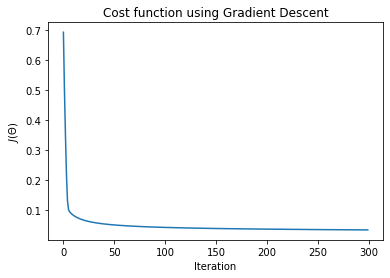

In [10]:
plt.plot(all_J[0:300])
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.show()

## One-vs-all Prediction

X : (m, n+1) m=5000 ->(데이터셋 개수), n=400 ->(각 데이터셋의 픽셀 수)  
theta : (10, n+1) 10 ->(class의 개수)
predictions : (m, 10)
    
numpy.argmax() : 최대값의 index를 출력 (axis = 인덱싱을 할 차원 지정)

리턴값에 1을 더하는 이유 : 데이터셋이 보이는 것처럼 0-9가 아닌 1-10으로 분류돼있음

In [11]:
def predictOneVsAll(all_theta, X):
    m= X.shape[0]
    X= np.hstack((np.ones((m,1)),X))
    
    predictions = X @ all_theta.T
    
    return np.argmax(predictions,axis=1)+1

In [12]:
pred = predictOneVsAll(all_theta, X)
print("Training Set Accuracy:", sum(pred[:,np.newaxis]==y)[0]/5000*100,"%")

Training Set Accuracy: 91.46 %


# Neural Networks

## Loading of theta

In [13]:
mat2=loadmat("ex3weights.mat")
Theta1=mat2["Theta1"]
Theta2=mat2["Theta2"]

## Feedforward propagation